
# Import required libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
# show datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


# 1. Make a list of categorical and numerical columns in the data.


In [4]:
df.columns.tolist()

['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']

In [5]:
# Make a list of categorical 

df_categorical_col = df.select_dtypes(include=['object'])

df_categorical_col.head()

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner


# 2.Compute the average bill amount for each day.


In [15]:

avgDay = df.groupby('day')['total_bill'].mean().reset_index()
avgDay

,day,total_bill
0,Fri,17.151579
1,Sat,20.441379
2,Sun,21.410000
3,Thur,17.682742


# 3. Which gender is more generous in giving tips?


In [19]:

df_max = df.groupby('sex')['tip'].sum().round(2)
df_max

sex
Female    246.51
Male      485.07
Name: tip, dtype: float64

In [9]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# 4. According to the data, were there more customers for dinner or lunch?


In [21]:

customer = df.groupby('time')['size'].sum()
customer

time
Dinner    463
Lunch     164
Name: size, dtype: int64

# 5. Based on the statistical summary, comment on the variable 'tip'


In [11]:

df.describe()['tip']

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

# 6. Find the busiest day in terms of the orders?


In [12]:

df.groupby('day').size()

day
Fri     19
Sat     87
Sun     76
Thur    62
dtype: int64

# 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot


In [22]:

df['total_bill'].skew()

1.1332130376158205

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


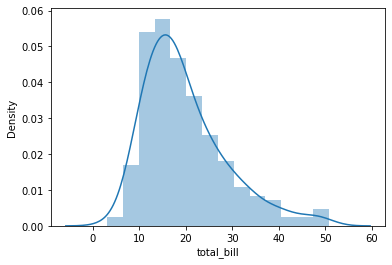

In [6]:
sns.distplot(df['total_bill'])
plt.show()

# 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

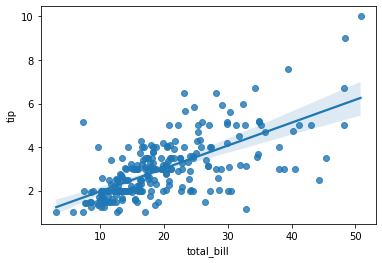

In [7]:

sns.regplot(x=df['total_bill'],y=df['tip'])

# 9. What is the percentage of males and females in the dataset? and display it in the plot.


<AxesSubplot:ylabel='sex'>

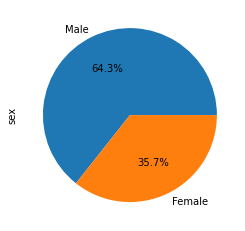

In [8]:

df['sex'].value_counts().plot(kind='pie',autopct='%1.1f%%')

# 10. Compute the gender-wise count based on smoking habits and display it in the plot


In [9]:

df.groupby('sex')['smoker'].value_counts()


sex     smoker
Female  No        54
        Yes       33
Male    No        97
        Yes       60
Name: smoker, dtype: int64

<AxesSubplot:xlabel='smoker'>

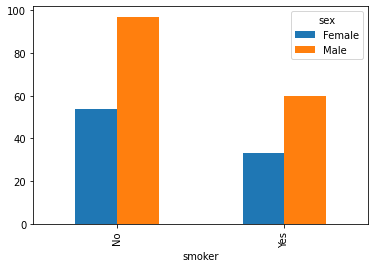

In [10]:
pd.crosstab(df['smoker'],df['sex']).plot(kind='bar')

# 11. Compute the average tip amount given for different days and display it in the plot.


,day,tip
0,Fri,2.734737
1,Sat,2.993103
2,Sun,3.255132
3,Thur,2.771452


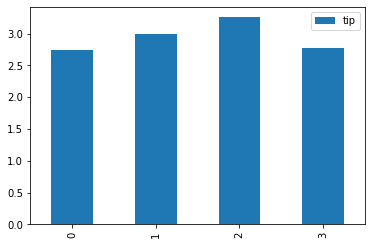

In [11]:

avg_tip = df.groupby('day')['tip'].mean().reset_index()
avg_tip.plot(kind='bar')
avg_tip


# 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.


,size,total_bill
0,1,7.242500
1,2,16.448013
2,3,23.277632
3,4,28.613514
4,5,30.068000
5,6,34.830000


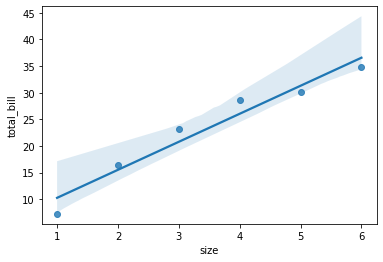

In [12]:

avg_billamount = df.groupby('size')['total_bill'].mean().reset_index()
sns.regplot(x=avg_billamount['size'],y=avg_billamount['total_bill'])
avg_billamount

# 13. Plot a horizontal boxplot to compare the bill amount based on gender.


<AxesSubplot:xlabel='total_bill', ylabel='sex'>

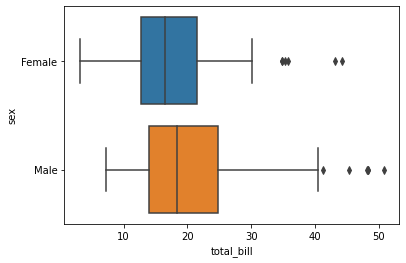

In [13]:

sns.boxplot(x=df['total_bill'], y=df['sex'],orient ='h')

# 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [14]:

x = df.groupby('day')['total_bill'].max()



In [15]:
x.loc[['Sat','Sun']]

day
Sat    50.81
Sun    48.17
Name: total_bill, dtype: float64

# 15. Compute the percentage of missing values in the dataset.

In [17]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

# 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.


In [18]:

df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
239    False
240    False
241    False
242    False
243    False
Length: 244, dtype: bool

In [19]:
# sum of duplicates
df.duplicated().sum()

1

In [20]:
# drop duplicates

df_final = df.drop_duplicates()


In [21]:
df_final.duplicated().sum()

0

# 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


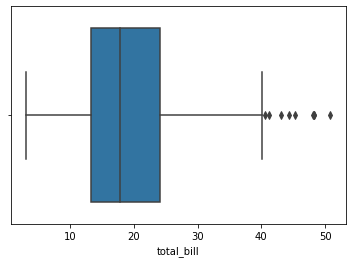

In [22]:

sns.boxplot(df['total_bill'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


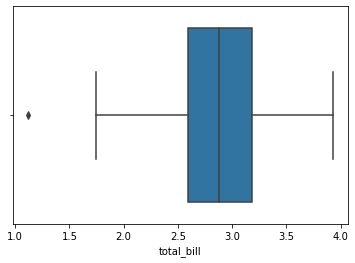

In [23]:
bill_log = np.log(df['total_bill'])
sns.boxplot(bill_log)
plt.show()

# 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


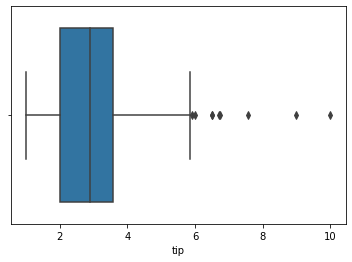

In [24]:

sns.boxplot(df['tip'])
plt.show()

In [25]:
q1 = df['tip'].quantile(0.25)
q2 = df['tip'].quantile(0.75)
iqr = q2-q1
print(q1)
print(q2)
print(iqr)

2.0
3.5625
1.5625


In [26]:
lower_whisker = q1-(1.5*iqr)
upper_whisker = q2+(1.5*iqr)
print(lower_whisker)
print(upper_whisker)

-0.34375
5.90625


In [27]:
bill_log2 = df.loc[(df['tip'] < upper_whisker) & (df['tip'] > lower_whisker)]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


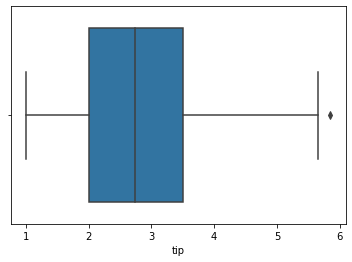

In [28]:

sns.boxplot(bill_log2['tip'])
plt.show()

# 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [35]:


df_encode =pd.get_dummies(df,drop_first=True)
df_encode

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,0,0,0,1,0,0
1,10.34,1.66,3,1,0,0,1,0,0
2,21.01,3.50,3,1,0,0,1,0,0
3,23.68,3.31,2,1,0,0,1,0,0
4,24.59,3.61,4,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,1,0,1,0,0,0
240,27.18,2.00,2,0,1,1,0,0,0
241,22.67,2.00,2,1,1,1,0,0,0
242,17.82,1.75,2,1,0,1,0,0,0


# 20. Check the range of the column 'total_bill' and transform the values such    that the range will be 1.

In [39]:

tb_max=df['total_bill'].max()
tb_min=df['total_bill'].min()
range=tb_max-tb_min
print(range)
from sklearn.preprocessing import MinMaxScaler
mm= MinMaxScaler()
df['total_bill_mm']=mm.fit_transform(df[['total_bill']])
tb_mm_max=df['total_bill_mm'].max()
tb_mm_min=df['total_bill_mm'].min()
range=tb_mm_max-tb_mm_min
print(range)


47.74
0.9999999999999999


# 21. Load the dataset again by giving the name of the dataframe as "tips_df"
 i) Encode the categorical variables.
 ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

 

In [40]:
# i) Encode the categorical variables.

df_enc = pd.get_dummies(df,drop_first=True)
df_enc.sample(5)

,total_bill,tip,size,total_bill_mm,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
233,10.77,1.47,2,0.161290,1,0,1,0,0,0
111,7.25,1.00,1,0.087558,0,0,1,0,0,0
67,3.07,1.00,1,0.000000,0,1,1,0,0,0
101,15.38,3.00,2,0.257855,0,1,0,0,0,0
36,16.31,2.00,3,0.277336,1,0,1,0,0,0


In [43]:
# ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

x=df_enc.drop(['tip'],axis=1)
y=df_enc['tip']

# 22. Split the dataset into two parts (i.e. 70% train and 30% test), and     Standardize the columns "total_bill" and "Size" using the mim_max scaling approach



In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=1)
from sklearn.preprocessing import MinMaxScaler

#create object
min_max = MinMaxScaler()

tips_scaled1 = df_enc.copy()

tips_scaled1.iloc[:,[0,2]] = min_max.fit_transform(tips_scaled1.iloc[:,[0,2]])
tips_scaled1.head()

,total_bill,tip,size,total_bill_mm,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,0.291579,1.01,0.2,0.291579,0,0,0,1,0,0
1,0.152283,1.66,0.4,0.152283,1,0,0,1,0,0
2,0.375786,3.50,0.4,0.375786,1,0,0,1,0,0
3,0.431713,3.31,0.2,0.431713,1,0,0,1,0,0
4,0.450775,3.61,0.6,0.450775,0,0,0,1,0,0


# 23. Train a linear regression model using the training data and print the                     r_squared value of the prediction on the test data.

In [37]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


0.49199291884148433